In [2]:
import pandas as pd
import numpy as np
import matplotlib.style as style
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import re
from datetime import datetime
from scipy.stats import mstats

style.use('fivethirtyeight')
pd.options.display.max_columns = 999
pd.options.display.float_format = '{:,.3f}'.format
%matplotlib inline  

In [5]:
df_rentalMrt = pd.read_csv('../data/processed/Propwall-PropertyToMRT.csv', index_col=0)

# Processed Data

In [31]:
df_rentalMrt2 = pd.read_csv('../data/processed/Propwall_Rental_Clean-12-3-18.csv')
df_rentalMrt2

Type                      Location  \
0       Condominium                           NaN   
1       Condominium                           NaN   
2       Condominium                           NaN   
3       Condominium                           NaN   
4       Condominium                           NaN   
5       Condominium                           NaN   
6       Condominium                           NaN   
7       Condominium                           NaN   
8       Condominium                           NaN   
9       Condominium                           NaN   
10      Condominium                           NaN   
11      Condominium                           NaN   
12      Condominium                           NaN   
13            House      Taman Desa, Kuala Lumpur   
14      Condominium                           NaN   
15      Condominium                           NaN   
16      Condominium        Tanjung Tokong, Penang   
17      Condominium                           NaN   
18      Condominium                           NaN   
19      Condominium      Titiwangsa, Kuala Lumpur   
20            House      Kuala Selangor, Selangor   
21      Condominium  Ara Damansara, Petaling Jaya   
22      Condominium                           NaN   
23      Condominium                           NaN   
24      Condominium                           NaN   
25      Condominium                           NaN   
26      Condominium                           NaN   
27      Condominium                           NaN   
28      Condominium                           NaN   
29      Condominium         Keramat, Kuala Lumpur   
...             ...                           ...   
619715  Condominium                           NaN   
619716  Condominium                           NaN   
619717  Condominium                           NaN   
619718  Condominium                           NaN   
619719  Condominium                           NaN   
619720  Condominium                           NaN   
619721  Condominium                           NaN   
619722  Condominium                           NaN   
619723  Condominium                           NaN   
619724  Condominium                           NaN   
619725  Condominium                           NaN   
619726  Condominium         Hampshire Place, KLCC   
619727  Condominium                           NaN   
619728  Condominium                           NaN   
619729  Condominium         Wisma Nusantara, KLCC   
619730  Condominium                           NaN   
619731  Condominium                           NaN   
619732  Condominium         Wisma Nusantara, KLCC   
619733  Condominium                           NaN   
619734  Condominium                           NaN   
619735  Condominium                           NaN   
619736  Condominium         Menara Hap Seng, KLCC   
619737  Condominium                           NaN   
619738  Condominium                           NaN   
619739  Condominium         Wisma Nusantara, KLCC   
619740  Condominium         Wisma Nusantara, KLCC   
619741  Condominium         Wisma Nusantara, KLCC   
619742  Condominium         Wisma Nusantara, KLCC   
619743  Condominium                           NaN   
619744  Condominium                           NaN   

                                 Property      price  size       layout  \
0                    Pulau Pangkor, Perak  4,300.000  1700    3-Bedroom   
1                       Batu Pahat, Johor  1,300.000  1150    3-Bedroom   
2                Taman Desa, Kuala Lumpur  1,950.000  1345    4-Bedroom   
3                      Ayer Keroh, Melaka  3,800.000  1200    3-Bedroom   
4                        Rawang, Selangor  3,000.000   920    1-Bedroom   
5                  Sungai Buloh, Selangor  1,400.000  1205    3-Bedroom   
6                Taman Desa, Kuala Lumpur  2,200.000  1115    3-Bedroom   
7                    Tanjung Malim, Perak  1,200.000   900    3-Bedroom   
8                  Sungai Buloh, Selangor  1,600.000 

In [32]:
# Filter for KL and Selangor properties
df_rentalMrt2 = df_rentalMrt2[(df_rentalMrt2['State'] == 'Kuala Lumpur') | (df_rentalMrt2['State'] == 'Selangor')].copy()
df_rentalMrt2 = df_rentalMrt2[(df_rentalMrt2['price'] < 10000)].copy()
df_rentalMrt2 = df_rentalMrt2[(df_rentalMrt2['size'] < 3000)].copy()

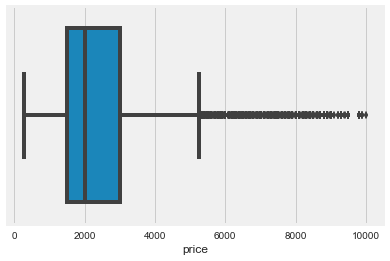

In [77]:
sns.boxplot(df_rentalMrt2['price'])

In [81]:
df_rentalMrt2

Type                         Location  \
2       Condominium                              NaN   
4       Condominium                              NaN   
5       Condominium                              NaN   
6       Condominium                              NaN   
8       Condominium                              NaN   
9       Condominium                              NaN   
10      Condominium                              NaN   
11      Condominium                              NaN   
19      Condominium         Titiwangsa, Kuala Lumpur   
20            House         Kuala Selangor, Selangor   
23      Condominium                              NaN   
29      Condominium            Keramat, Kuala Lumpur   
34            House              Putrajaya, Selangor   
36      Condominium      Kenny Heights, Kuala Lumpur   
41      Condominium               Selayang, Selangor   
43            House  Damansara Heights, Kuala Lumpur   
46      Condominium                              NaN   
49      Condominium                              NaN   
50      Condominium                              NaN   
53      Condominium                              NaN   
54      Condominium                 Gombak, Selangor   
58      Condominium             Pantai, Kuala Lumpur   
60      Condominium               TTDI, Kuala Lumpur   
67      Condominium                 Sepang, Selangor   
68      Condominium         Titiwangsa, Kuala Lumpur   
75      Condominium               TTDI, Kuala Lumpur   
82      Condominium              Putrajaya, Selangor   
84      Condominium                              NaN   
86      Condominium                              NaN   
91      Condominium                              NaN   
...             ...                              ...   
619708  Condominium                              NaN   
619709  Condominium                              NaN   
619710  Condominium                              NaN   
619712  Condominium                              NaN   
619713  Condominium                              NaN   
619714  Condominium                              NaN   
619715  Condominium                              NaN   
619716  Condominium                              NaN   
619717  Condominium                              NaN   
619718  Condominium                              NaN   
619719  Condominium                              NaN   
619722  Condominium                              NaN   
619723  Condominium                              NaN   
619724  Condominium                              NaN   
619725  Condominium                              NaN   
619726  Condominium            Hampshire Place, KLCC   
619728  Condominium                              NaN   
619729  Condominium            Wisma Nusantara, KLCC   
619730  Condominium                              NaN   
619731  Condominium                              NaN   
619732  Condominium            Wisma Nusantara, KLCC   
619735  Condominium                              NaN   
619736  Condominium            Menara Hap Seng, KLCC   
619737  Condominium                              NaN   
619738  Condominium                              NaN   
619739  Condominium            Wisma Nusantara, KLCC   
619740  Condominium            Wisma Nusantara, KLCC   
619741  Condominium            Wisma Nusantara, KLCC   
619742  Condominium            Wisma Nusantara, KLCC   
619743  Condominium                              NaN   

                                   Property     price  size     layout  \
2                  Taman Desa, Kuala Lumpur 1,950.000  1345  4-Bedroom   
4                          Rawang, Selangor 3,000.000   920  1-Bedroom   
5                    Sungai Buloh, Selangor 1,400.000  1205  3-Bedroom   
6                  Taman Desa, Kuala Lumpur 2,200.000  1115  3-Bedroom   
8                    Sungai Buloh, Selangor 1,600.000  1001  2-Bedroom   
9                    Sungai Buloh, Selangor 1,600.000   936  3-Bedroom   
10                   Sun

In [33]:
df_rentalMrt2 = df_rentalMrt2.join(df_rentalMrt, on='Location_property').copy()

In [34]:
df_rentalMrt2 = df_rentalMrt2[df_rentalMrt2['lat'].notnull()].copy()

In [20]:
df_rentalMrt2[df_rentalMrt2['lat'].isnull()]['Location_property'].to_csv('../data/interim/PropwallMissingGeocodes-23-3-2018.csv')

In [39]:
df_propwallByProperties = df_rentalMrt2.groupby(['Location_property', 'year_month']).mean()

In [9]:
df_propwallByProperties.describe()

price       size       bath    carpark  num_bedroom       year  \
count 26,060.000 26,060.000 26,060.000 26,060.000   26,060.000 26,060.000   
mean   2,108.704  1,184.106      0.676      0.184        2.806  2,015.015   
std    1,242.855    442.896      1.027      0.416        0.880      1.312   
min      380.000    250.000      0.000      0.000        0.000  2,013.000   
25%    1,300.000    888.000      0.000      0.000        2.500  2,014.000   
50%    1,700.000  1,066.667      0.000      0.000        3.000  2,015.000   
75%    2,500.000  1,370.033      1.667      0.000        3.000  2,016.000   
max    9,800.000  2,996.000      7.000      5.500        7.000  2,017.000   

           month  Price_persqft        lat        lng  \
count 26,060.000     26,060.000 26,060.000 26,060.000   
mean       6.534          1.754      3.226    100.749   
std        3.399          0.584      2.130     14.371   
min        1.000          1.026      0.176   -117.619   
25%        4.000          1.301      2.995    101.585   
50%        7.000          1.557      3.063    101.634   
75%        9.000          2.094      3.126    101.751   
max       12.000          3.500     36.100    124.144   

       dist_from_Sungai Buloh MRT Station_km  \
count                             26,060.000   
mean                                  89.147   
std                                  939.590   
min                                    0.398   
25%                                   15.232   
50%                                   21.984   
75%                                   28.740   
max                               14,218.630   

       dist_from_Kampung Selamat MRT Station_km  \
count                                26,060.000   
mean                                     88.553   
std                                     939.701   
min                                       0.283   
25%                                      14.543   
50%                                      21.457   
75%                                      28.032   
max                                  14,219.600   

       dist_from_Kwasa Damansara MRT Station_km  \
count                                26,060.000   
mean                                     87.421   
std                                     939.931   
min                                       0.468   
25%                                      13.395   
50%                                      20.844   
75%                                      26.324   
max                                  14,221.717   

       dist_from_Kwasa Sentral MRT Station_km  \
count                              26,060.000   
mean                                   87.372   
std                                   940.014   
min                                     1.135   
25%                                    13.131   
50%                                    21.045   
75%                                    25.667   
max                                14,222.829   

       dist_from_Kota Damansara MRT Station_km  \
count                               26,060.000   
mean                                    85.655   
std                                    940.176   
min                                      0.177   
25%                                     12.002   
50%                                     19.057   
75%                                     24.233   
max                                 14,223.428   

       dist_from_Surian MRT Station_km  \
count                       26,060.000   
mean                            85.078   
std                            940.142   
min                              0.230   
25%                             11.237   
50%                             18.222   
75%                             23.836   
max                         14,222.388   

       dist_from_Mutiara Damansara MRT Station_km  \
count                                  26,060.000   
mean                                       84.994   
std                

In [36]:
def isCloseFromMRT(df, mrt_name, dist_threshold=0.8):
    df["is_close_to_{}".format(mrt_name)] = np.where(df["dist_from_{}_km".format(mrt_name)]<=dist_threshold, True, False)

In [40]:
mrt_location = pd.read_excel('../data/external/mrt_stations-29-01-2017.xlsx')
mrt_location_arr = mrt_location.station.values

for station in mrt_location_arr[0:12]:
    print (station)
    isCloseFromMRT(df_propwallByProperties, station)
is_close_mrt_arr = np.array([df_propwallByProperties[i] for i in list(df_propwallByProperties.select_dtypes(include=['bool']))])
df_propwallByProperties['is_close_to_MRT'] = np.any(is_close_mrt_arr, axis=0)

Sungai Buloh MRT Station
Kampung Selamat MRT Station
Kwasa Damansara MRT Station
Kwasa Sentral MRT Station
Kota Damansara MRT Station
Surian MRT Station
Mutiara Damansara MRT Station
Bandar Utama MRT Station
Taman Tun Dr Ismail (TTDI) MRT Station
Phileo Damansara MRT Station
Pusat Bandar Damansara MRT Station
Semantan MRT Station


In [38]:
mrt_location_arr[0:12]

array(['Sungai Buloh MRT Station', 'Kampung Selamat MRT Station',
       'Kwasa Damansara MRT Station', 'Kwasa Sentral MRT Station',
       'Kota Damansara MRT Station', 'Surian MRT Station',
       'Mutiara Damansara MRT Station', 'Bandar Utama MRT Station',
       'Taman Tun Dr Ismail (TTDI) MRT Station',
       'Phileo Damansara MRT Station',
       'Pusat Bandar Damansara MRT Station', 'Semantan MRT Station'], dtype=object)

In [87]:
df_propwallByProperties.to_csv('../data/processed/PropwallProperties-DistToMRT-23-3-2018.csv')

# Analysis Starts

In [4]:
df_propwallByProperties = pd.read_csv('../data/processed/PropwallProperties-DistToMRT-23-3-2018.csv')
df_propwallByProperties

Location_property year_month     price      size  bath  \
0             1 Shamelin, Cheras    2013-07 1,850.000 1,650.000 0.000   
1             1 Shamelin, Cheras    2013-08 2,250.000 1,650.000 0.000   
2             1 Shamelin, Cheras    2014-04 1,800.000 1,650.000 0.000   
3             1 Shamelin, Cheras    2014-07 2,500.000 2,275.000 0.000   
4             1 Shamelin, Cheras    2014-08 2,500.000 1,650.000 0.000   
5             1 Shamelin, Cheras    2015-09 2,200.000 1,950.000 0.000   
6             1 Shamelin, Cheras    2015-10 2,150.000 1,900.000 0.000   
7             1 Shamelin, Cheras    2016-10 2,300.000 1,650.000 3.000   
8      10 Mont Kiara, Mont Kiara    2013-01 2,380.000 1,218.400 0.000   
9      10 Mont Kiara, Mont Kiara    2013-02 2,095.000   962.500 0.000   
10     10 Mont Kiara, Mont Kiara    2013-03 1,800.000 1,000.000 0.000   
11     10 Mont Kiara, Mont Kiara    2013-04 2,176.667 1,021.111 0.000   
12     10 Mont Kiara, Mont Kiara    2013-05 1,809.500   929.850 0.000   
13     10 Mont Kiara, Mont Kiara    2013-06 1,777.778   843.444 0.000   
14     10 Mont Kiara, Mont Kiara    2013-07 1,910.000   891.100 0.000   
15     10 Mont Kiara, Mont Kiara    2013-08 2,050.000   930.500 0.000   
16     10 Mont Kiara, Mont Kiara    2013-09 3,333.333 1,525.111 0.000   
17     10 Mont Kiara, Mont Kiara    2013-10 2,278.571 1,042.071 0.000   
18     10 Mont Kiara, Mont Kiara    2013-11 2,327.857 1,088.571 0.000   
19     10 Mont Kiara, Mont Kiara    2013-12 2,377.778 1,205.556 0.000   
20     10 Mont Kiara, Mont Kiara    2014-01 2,490.000 1,179.200 0.000   
21     10 Mont Kiara, Mont Kiara    2014-02 2,288.571 1,016.500 0.000   
22     10 Mont Kiara, Mont Kiara    2014-03 2,316.667   986.500 0.000   
23     10 Mont Kiara, Mont Kiara    2014-04 1,950.000   930.000 0.000   
24     10 Mont Kiara, Mont Kiara    2014-05 2,055.556   966.556 0.000   
25     10 Mont Kiara, Mont Kiara    2014-06 2,020.000   916.900 0.000   
26     10 Mont Kiara, Mont Kiara    2014-07 2,114.286   874.286 0.000   
27     10 Mont Kiara, Mont Kiara    2014-08 1,823.200   809.920 0.000   
28     10 Mont Kiara, Mont Kiara    2014-09 2,212.500   871.000 0.000   
29     10 Mont Kiara, Mont Kiara    2014-10 2,029.167   915.667 0.000   
...                          ...        ...       ...       ...   ...   
44243            myHabitat, KLCC    2014-06 5,766.667 2,200.000 0.000   
44244            myHabitat, KLCC    2014-07 5,480.000 2,204.600 0.000   
44245            myHabitat, KLCC    2014-08 5,500.000 2,200.000 0.000   
44246            myHabitat, KLCC    2014-09 4,150.000 1,758.333 0.000   
44247            myHabitat, KLCC    2014-10 5,600.000 2,200.000 0.000   
44248            myHabitat, KLCC    2014-11 4,431.250 1,915.375 0.000   
44249            myHabitat, KLCC    2014-12 4,775.000 2,016.833 0.000   
44250            myHabitat, KLCC    2015-01 4,350.000 1,950.000 0.000   
44251            myHabitat, KLCC    2015-02 3,248.286 1,491.000 0.000   
44252            myHabitat, KLCC    2015-03 4,146.667 1,885.667 0.000   
44253            myHabitat, KLCC    2015-04 5,112.571 2,149.429 0.000   
44254            myHabitat, KLCC    2015-05 4,933.333 2,197.167 0.000   
44255            myHabitat, KLCC    2015-06 2,850.000 1,803.500 0.000   
44256            myHabitat, KLCC    2015-07 2,725.000 1,580.000 0.000   
44257            myHabitat, KLCC    2015-08 3,575.000 1,687.750 0.000   
44258            myHabitat, KLCC    2015-09 3,180.000 1,725.600 0.000   
44259            myHabitat, KLCC    2015-10 3,900.000 2,200.000 0.000   
44260            myHabitat, KLCC    2015-11 2,866.667 1,836.667 0.000   
44261            myHabitat, KLCC    2016-02 5,500.000 2,100.000 3.000   
44262            myHabitat, KLCC    2016-03 1,650.000 1,106.000 2.000   
44263            myHabitat, KLCC    2016-04 5,750.000 2,163.000 2.000   
44264            myHabitat, KLCC    2016-05 1,350.000 1,166.500 0.000   
44265            myHabitat, KLCC    2016-07 1,500.000 1,400.000 3.000   


In [41]:
columns_of_interest= ['price', 'size', 'bath', 'carpark', 'num_bedroom', 'Price_persqft','is_close_to_MRT','year_month']
rentalsNearMRT_ts = df_propwallByProperties[df_propwallByProperties['is_close_to_MRT']]\
    .reset_index()\
    [columns_of_interest]\
    .groupby('year_month').mean()

rentalsNotNearMRT_ts = df_propwallByProperties[~df_propwallByProperties['is_close_to_MRT']]\
    .reset_index()\
    [columns_of_interest]\
    .groupby('year_month').mean()

In [42]:
rentalsNearMRT_ts = rentalsNearMRT_ts.reset_index()
rentalsNotNearMRT_ts = rentalsNotNearMRT_ts.reset_index()

In [5]:
rentalsNearMRT_ts.groupby(rentalsNearMRT_ts.index // 3).mean()

price      size  bath  carpark  num_bedroom  Price_persqft  \
0  2,427.599 1,268.732 0.000    0.000        2.653          1.823   
1  2,450.390 1,302.708 0.000    0.000        2.809          1.807   
2  2,437.105 1,307.665 0.002    0.001        2.855          1.801   
3  2,358.334 1,262.976 0.000    0.000        2.741          1.805   
4  2,303.757 1,220.304 0.002    0.001        2.460          1.800   
5  2,257.573 1,212.614 0.000    0.000        2.524          1.791   
6  2,223.771 1,208.845 0.000    0.000        2.503          1.762   
7  2,283.591 1,234.352 0.001    0.000        2.686          1.802   
8  2,234.482 1,201.166 0.002    0.000        2.596          1.782   
9  2,188.173 1,214.872 0.000    0.000        2.895          1.738   
10 2,128.685 1,191.993 0.002    0.002        2.917          1.731   
11 2,114.790 1,193.423 0.020    0.001        2.926          1.716   
12 2,064.867 1,189.532 0.647    0.237        3.022          1.687   
13 1,982.597 1,154.431 1.119    0.279        2.978          1.664   
14 2,094.332 1,179.212 2.107    0.264        2.985          1.718   
15 2,117.435 1,156.953 2.149    0.521        2.917          1.781   
16 2,069.678 1,160.215 2.081    0.653        2.902          1.771   
17 2,271.464 1,181.522 2.077    0.623        2.886          1.832   
18 2,255.372 1,173.613 2.149    0.618        2.908          1.864   
19 2,259.980 1,169.455 2.066    0.744        2.815          1.862   

    is_close_to_MRT  
0              True  
1              True  
2              True  
3              True  
4              True  
5              True  
6              True  
7              True  
8              True  
9              True  
10             True  
11             True  
12             True  
13             True  
14             True  
15             True  
16             True  
17             True  
18             True  
19             True

In [6]:
rentalsMRT_ts = df_propwallByProperties\
    .reset_index()\
    [columns_of_interest]\
    .groupby('year_month').mean()

In [100]:
rentalsMRT_ts.rolling(window=3).mean().to_excel('../data/processed/propwallMRTTimeSeries-rollingmean.xlsx')

In [7]:
rentalsMRT_ts

price      size  bath  carpark  num_bedroom  Price_persqft  \
year_month                                                                  
2013-01    2,383.823 1,255.130 0.000    0.000        2.642          1.815   
2013-02    2,391.058 1,242.788 0.000    0.000        2.622          1.886   
2013-03    2,298.473 1,250.029 0.000    0.000        2.645          1.796   
2013-04    2,340.790 1,275.656 0.001    0.000        2.755          1.792   
2013-05    2,301.577 1,253.824 0.003    0.003        2.722          1.795   
2013-06    2,319.688 1,253.945 0.000    0.000        2.684          1.799   
2013-07    2,344.223 1,269.844 0.001    0.000        2.772          1.803   
2013-08    2,373.198 1,273.658 0.000    0.000        2.839          1.813   
2013-09    2,308.372 1,256.831 0.001    0.001        2.769          1.794   
2013-10    2,331.957 1,252.158 0.000    0.000        2.673          1.810   
2013-11    2,330.984 1,249.668 0.000    0.000        2.716          1.821   
2013-12    2,269.338 1,242.525 0.001    0.001        2.700          1.790   
2014-01    2,246.031 1,235.564 0.003    0.002        2.569          1.784   
2014-02    2,304.163 1,237.463 0.002    0.001        2.639          1.811   
2014-03    2,234.836 1,222.029 0.001    0.000        2.522          1.788   
2014-04    2,292.586 1,242.924 0.004    0.003        2.522          1.803   
2014-05    2,242.857 1,226.625 0.000    0.000        2.650          1.788   
2014-06    2,261.478 1,241.145 0.001    0.001        2.648          1.779   
2014-07    2,297.530 1,234.373 0.002    0.001        2.614          1.810   
2014-08    2,251.638 1,229.514 0.003    0.002        2.515          1.801   
2014-09    2,239.663 1,239.354 0.002    0.001        2.727          1.780   
2014-10    2,232.849 1,221.181 0.007    0.000        2.668          1.782   
2014-11    2,270.272 1,231.557 0.007    0.002        2.679          1.810   
2014-12    2,208.473 1,202.737 0.004    0.001        2.596          1.804   
2015-01    2,272.457 1,221.309 0.001    0.000        2.605          1.814   
2015-02    2,271.305 1,212.908 0.004    0.000        2.298          1.833   
2015-03    2,251.138 1,227.203 0.001    0.000        2.866          1.792   
2015-04    2,249.270 1,252.115 0.000    0.000        2.907          1.764   
2015-05    2,214.296 1,222.013 0.003    0.002        2.882          1.781   
2015-06    2,174.094 1,222.377 0.004    0.000        2.965          1.756   
2015-07    2,187.798 1,221.574 0.001    0.000        2.954          1.761   
2015-08    2,148.516 1,201.141 0.001    0.001        2.956          1.756   
2015-09    2,189.274 1,227.045 0.005    0.001        2.951          1.752   
2015-10    2,153.926 1,218.143 0.011    0.003        2.946          1.741   
2015-11    2,170.955 1,233.053 0.018    0.005        2.916          1.740   
2015-12    2,162.488 1,198.780 0.030    0.011        2.965          1.764   
2016-01    2,074.955 1,181.253 0.750    0.256        2.994          1.735   
2016-02    2,135.843 1,189.785 0.756    0.233        3.015          1.763   
2016-03    2,087.284 1,185.979 0.819    0.280        2.985          1.735   
2016-04    2,077.197 1,186.820 0.937    0.294        2.995          1.730   
2016-05    2,064.048 1,180.382 0.918    0.255        2.989          1.719   
2016-06    2,055.612 1,185.934 1.600    0.218        3.002          1.709   
2016-07    2,104.894 1,190.390 2.031    0.243        2.976          1.745   
2016-08    2,096.493 1,182.212 2.109    0.326        2.938          1.750   
2016-09    2,083.907 1,177.098 2.146    0.302        2.969          1.734   
2016-10    2,103.448 1,182.597 2.166    0.320        2.960          1.743   
2016-11    2,140.266 1,172.727 2.109    0.599        2.893          1.800   
2016-12    2,071.684 1,163.343 2.076    0.560        2.875          1.770   
2017-01    2,152.750 1,184.448 2.056    0.646        2.858          1.809   
2017-02    2,108.604 1,174.183 2.100    0.624        2.880          1.793   
2017-03    

In [89]:
rentalsNearMRT_ts.rolling(window=3).mean()

price      size  bath  carpark  num_bedroom  Price_persqft  \
year_month                                                                  
2013-01          nan       nan   nan      nan          nan            nan   
2013-02          nan       nan   nan      nan          nan            nan   
2013-03    2,427.599 1,268.732 0.000    0.000        2.653          1.823   
2013-04    2,410.776 1,268.322 0.000    0.000        2.670          1.816   
2013-05    2,437.188 1,300.492 0.000    0.000        2.735          1.805   
2013-06    2,450.390 1,302.708 0.000    0.000        2.809          1.807   
2013-07    2,426.872 1,301.735 0.002    0.001        2.874          1.798   
2013-08    2,449.278 1,301.140 0.002    0.001        2.867          1.811   
2013-09    2,437.105 1,307.665 0.002    0.001        2.855          1.801   
2013-10    2,452.535 1,301.763 0.000    0.000        2.797          1.819   
2013-11    2,388.601 1,282.969 0.000    0.000        2.774          1.805   
2013-12    2,358.334 1,262.976 0.000    0.000        2.741          1.805   
2014-01    2,292.517 1,236.422 0.000    0.000        2.612          1.785   
2014-02    2,290.520 1,221.382 0.002    0.001        2.526          1.790   
2014-03    2,303.757 1,220.304 0.002    0.001        2.460          1.800   
2014-04    2,302.631 1,223.527 0.003    0.002        2.452          1.803   
2014-05    2,292.086 1,228.224 0.000    0.000        2.468          1.789   
2014-06    2,257.573 1,212.614 0.000    0.000        2.524          1.791   
2014-07    2,298.192 1,225.943 0.000    0.000        2.581          1.794   
2014-08    2,223.361 1,201.918 0.000    0.000        2.525          1.775   
2014-09    2,223.771 1,208.845 0.000    0.000        2.503          1.762   
2014-10    2,199.353 1,204.270 0.000    0.000        2.594          1.757   
2014-11    2,261.131 1,222.502 0.000    0.000        2.682          1.794   
2014-12    2,283.591 1,234.352 0.001    0.000        2.686          1.802   
2015-01    2,246.828 1,224.452 0.002    0.000        2.620          1.786   
2015-02    2,225.545 1,213.237 0.002    0.000        2.493          1.770   
2015-03    2,234.482 1,201.166 0.002    0.000        2.596          1.782   
2015-04    2,275.778 1,215.209 0.002    0.000        2.691          1.793   
2015-05    2,271.651 1,215.982 0.001    0.000        2.874          1.786   
2015-06    2,188.173 1,214.872 0.000    0.000        2.895          1.738   
2015-07    2,150.997 1,197.176 0.000    0.000        2.924          1.741   
2015-08    2,107.316 1,187.951 0.002    0.002        2.933          1.723   
2015-09    2,128.685 1,191.993 0.002    0.002        2.917          1.731   
2015-10    2,123.704 1,197.112 0.019    0.002        2.925          1.720   
2015-11    2,117.951 1,200.900 0.018    0.000        2.926          1.713   
2015-12    2,114.790 1,193.423 0.020    0.001        2.926          1.716   
2016-01    2,091.232 1,184.714 0.178    0.077        2.923          1.708   
2016-02    2,093.989 1,189.463 0.386    0.149        2.985          1.702   
2016-03    2,064.867 1,189.532 0.647    0.237        3.022          1.687   
2016-04    2,040.947 1,181.573 0.781    0.259        3.030          1.677   
2016-05    2,006.290 1,161.426 0.849    0.271        2.982          1.671   
2016-06    1,982.597 1,154.431 1.119    0.279        2.978          1.664   
2016-07    2,023.104 1,167.814 1.495    0.237        2.983          1.685   
2016-08    2,068.799 1,176.554 1.928    0.263        2.987          1.713   
2016-09    2,094.332 1,179.212 2.107    0.264        2.985          1.718   
2016-10    2,052.286 1,151.171 2.129    0.317        2.948          1.718   
2016-11    2,075.441 1,155.090 2.137    0.421        2.953          1.737   
2016-12    2,117.435 1,156.953 2.149    0.521        2.917          1.781   
2017-01    2,140.192 1,167.545 2.134    0.613        2.947          1.795   
2017-02    2,081.162 1,156.583 2.097    0.612        2.918          1.779   
2017-03    

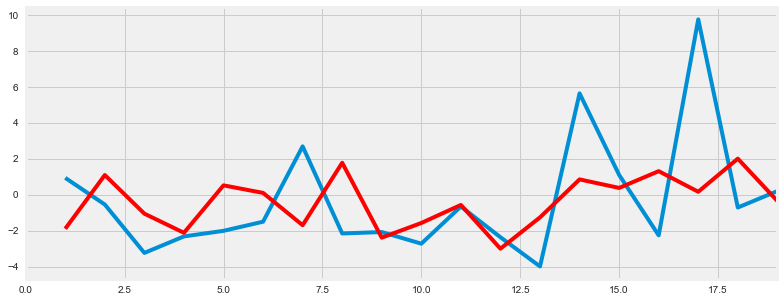

In [8]:
fig = plt.figure(figsize=(12,5))
rentalsNearMRT_ts.groupby(rentalsNearMRT_ts.index // 3).mean()['price']\
    .pct_change()\
    .apply(lambda x: x * 100)\
    .plot()
    
rentalsNotNearMRT_ts.groupby(rentalsNotNearMRT_ts.index // 3).mean()['price']\
    .pct_change()\
    .apply(lambda x: x * 100)\
    .plot(color='red')

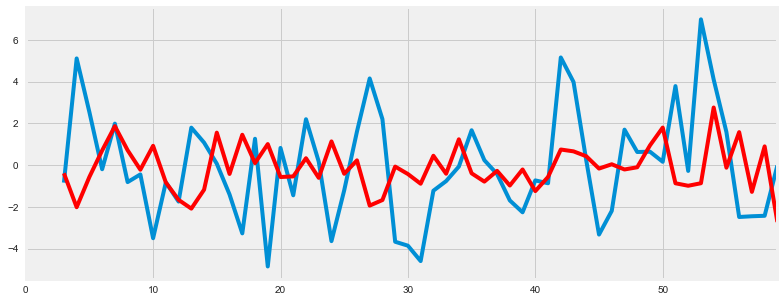

In [27]:
fig = plt.figure(figsize=(12,5))
rentalsNearMRT_ts.rolling(window=3).mean()['price']\
    .pct_change()\
    .apply(lambda x: x * 100)\
    .plot()
    
rentalsNotNearMRT_ts.rolling(window=3).mean()['price']\
    .pct_change()\
    .apply(lambda x: x * 100)\
    .plot(color='red')

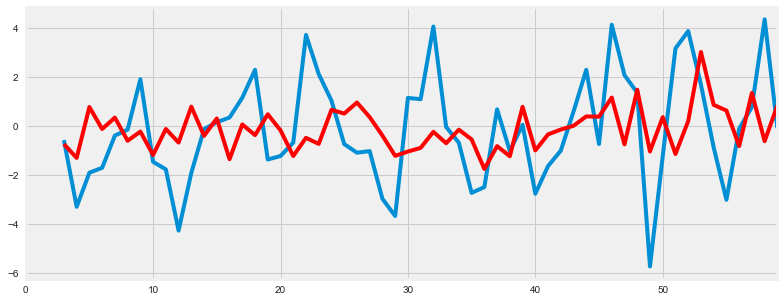

In [15]:
fig = plt.figure(figsize=(12,5))
rentalsNearMRT_ts.rolling(window=3).mean()['price']\
    .pct_change()\
    .apply(lambda x: x * 100)\
    .plot()
    
rentalsNotNearMRT_ts.rolling(window=3).mean()['price']\
    .pct_change()\
    .apply(lambda x: x * 100)\
    .plot(color='red')

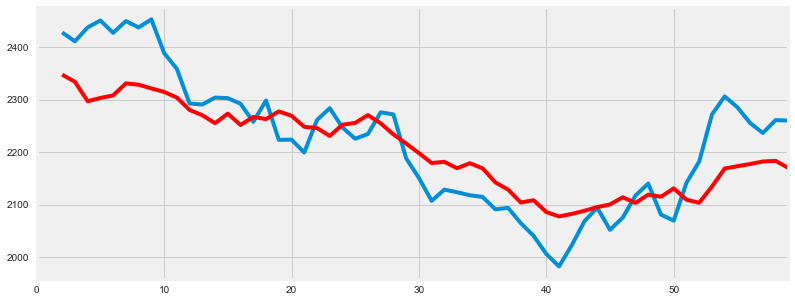

In [15]:
fig = plt.figure(figsize=(12,5))
rentalsNearMRT_ts.rolling(window=3).mean()['price']\
    .plot()
    
rentalsNotNearMRT_ts.rolling(window=3).mean()['price']\
    .plot(color='red')

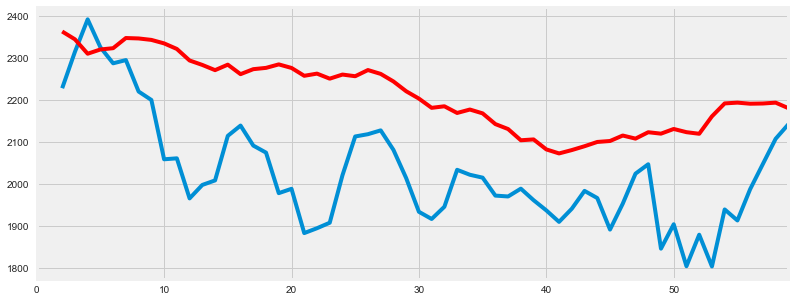

In [43]:
fig = plt.figure(figsize=(12,5))
rentalsNearMRT_ts.rolling(window=3).mean()['price']\
    .plot()
    
rentalsNotNearMRT_ts.rolling(window=3).mean()['price']\
    .plot(color='red')

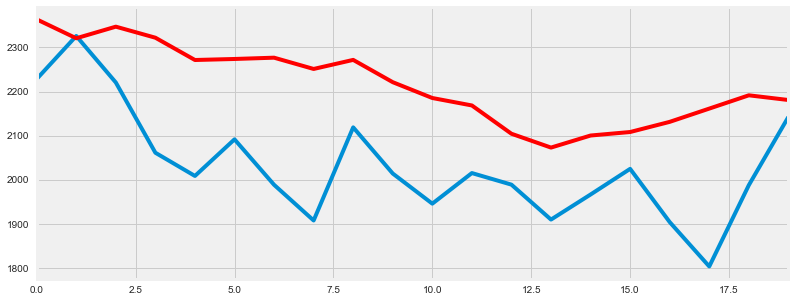

In [46]:
fig = plt.figure(figsize=(12,5))
rentalsNearMRT_ts.groupby(rentalsNearMRT_ts.index // 3).mean()['price']\
    .plot()
    
rentalsNotNearMRT_ts.groupby(rentalsNearMRT_ts.index // 3).mean()['price']\
    .plot(color='red')

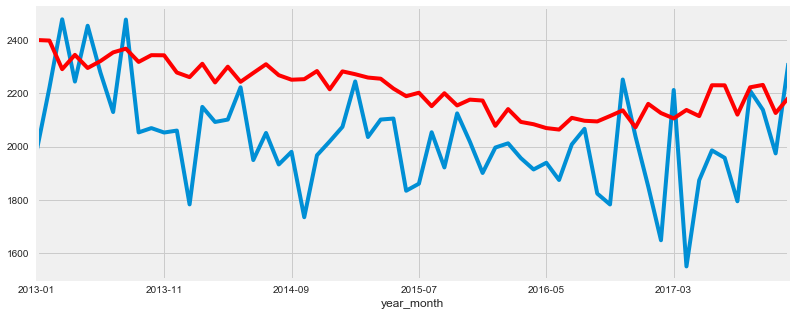

In [45]:
fig = plt.figure(figsize=(12,5))
rentalsNearMRT_ts.set_index('year_month')['price']\
    .plot()
    
rentalsNotNearMRT_ts.set_index('year_month')['price']\
    .plot(color='red')

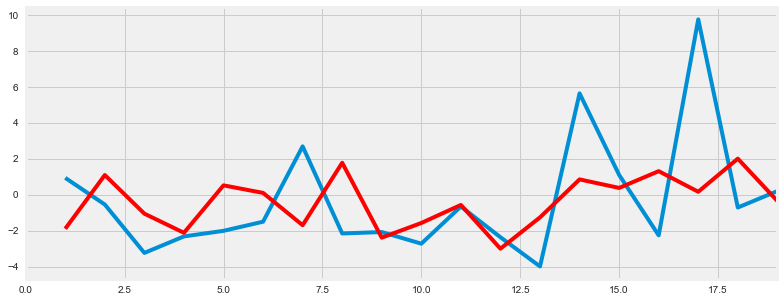

In [14]:
fig = plt.figure(figsize=(12,5))
rentalsNearMRT_ts.groupby(rentalsNearMRT_ts.index // 3).mean()['price']\
    .pct_change()\
    .apply(lambda x: x * 100)\
    .plot()
    
rentalsNotNearMRT_ts.groupby(rentalsNearMRT_ts.index // 3).mean()['price']\
    .pct_change()\
    .apply(lambda x: x * 100)\
    .plot(color='red')

In [57]:
# Convenience function to plot timeseries
def plotTimeSeries(series, ylabel_in="", title_in=""):
    fig = plt.figure(figsize=(12,5))
    series.plot()
    plt.ylabel(ylabel_in)
    plt.title(title_in)

# Analysis: Specific Location? Cheras

# Analysis: MRT effect - pairedT test

In [2]:
from sklearn.preprocessing import normalize
from scipy import stats
import pandas as pd

In [3]:
df_propwallByProperties = pd.read_csv('../data/processed/PropwallProperties-DistToMRT-23-3-2018.csv')

In [4]:
#check rental price near and not near mrt after mrt announcement 2016
propwallNearMrt_price  = df_propwallByProperties[ (df_propwallByProperties['is_close_to_MRT'] == True) &
                        (df_propwallByProperties['year_month'] > '2016-12')].groupby('year_month')\
                    ['Price_persqft'].mean().reset_index()['Price_persqft']
propwallNotNearMrt_price  = df_propwallByProperties[ (df_propwallByProperties['is_close_to_MRT'] == False) &
                        (df_propwallByProperties['year_month'] > '2016-12')].groupby('year_month')\
                    ['Price_persqft'].mean().reset_index()['Price_persqft'] 

In [65]:
normNearMrt = normalize(propwallNearMrt_price[:,np.newaxis], axis=0).ravel()
normNotNearMrt = normalize(propwallNotNearMrt_price[:,np.newaxis], axis=0).ravel()

In [66]:
len(normNearMrt)

12

In [67]:
len(normNotNearMrt)

12

In [5]:
#ormality and pairedT test
def normality_pairedT_Test(twosets,alpha = 5e-2):
    pvalue_list = []
    for i in twosets:
        k2, p = stats.normaltest(i)
        print("p = {:g}".format(p))
        if alpha>p:  # null hypothesis: x comes from a normal distribution
            print("The null hypothesis can be rejected: Not Normally Distributed")
        else:
            print("The null hypothesis cannot be rejected: Normally Distributed")
        pvalue_list.append(p)
    if len([i for i in pvalue_list if i>alpha])==2:
        print('parametric test')
        print(stats.ttest_rel(a = twosets[0],b = twosets[1]))
    else:
        print('non-parametric test')
        print(stats.wilcoxon(x = twosets[0], y = twosets[1]))        

In [79]:
normality_pairedT_Test([normNearMrt,normNotNearMrt])

p = 0.328842
The null hypothesis cannot be rejected: Normally Distributed
p = 0.628643
The null hypothesis cannot be rejected: Normally Distributed
parametric test
Ttest_relResult(statistic=-0.043311952700130184, pvalue=0.96622908247504369)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [6]:
normality_pairedT_Test([propwallNearMrt_price ,propwallNotNearMrt_price])

p = 0.328842
The null hypothesis cannot be rejected: Normally Distributed
p = 0.628643
The null hypothesis cannot be rejected: Normally Distributed
parametric test
Ttest_relResult(statistic=0.83605281638738005, pvalue=0.4209153485035747)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))
